In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
covid = pd.read_excel('data/HIST_PAINEL_COVIDBR_15jul2020.xlsx')

In [3]:
covid.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,611479.000000,607503.000000,605172.000000,611479.000000,6.114790e+05,611479.000000,611479.000000,611479.000000,8.700000e+01,87.000000,605172.00000
mean,32.204310,323717.906267,32248.191856,21.129744,3.084572e+02,9.649136,14.467844,0.369756,3.593848e+05,303539.597701,0.07080
std,9.835743,98058.404703,9787.757045,4.605949,1.161331e+04,326.552027,521.027397,11.721308,3.507017e+05,219483.099794,0.25649
min,11.000000,110000.000000,11001.000000,9.000000,0.000000e+00,-1812.000000,0.000000,-238.000000,2.213000e+04,14062.000000,0.00000
25%,25.000000,251065.000000,25009.000000,17.000000,0.000000e+00,0.000000,0.000000,0.000000,6.617050e+04,88024.000000,0.00000
50%,31.000000,314350.000000,31055.000000,21.000000,2.000000e+00,0.000000,0.000000,0.000000,2.110800e+05,285430.000000,0.00000
75%,41.000000,411550.000000,41013.000000,25.000000,1.900000e+01,0.000000,1.000000,0.000000,5.924970e+05,484964.000000,0.00000
max,76.000000,530010.000000,53001.000000,29.000000,1.966748e+06,54771.000000,75366.000000,1473.000000,1.209208e+06,669377.000000,1.00000


In [4]:
covid.info() # checando a tipagem dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611479 entries, 0 to 611478
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  611479 non-null  object        
 1   estado                  611337 non-null  object        
 2   municipio               605172 non-null  object        
 3   coduf                   611479 non-null  int64         
 4   codmun                  607503 non-null  float64       
 5   codRegiaoSaude          605172 non-null  float64       
 6   nomeRegiaoSaude         605172 non-null  object        
 7   data                    611479 non-null  datetime64[ns]
 8   semanaEpi               611479 non-null  int64         
 9   populacaoTCU2019        609148 non-null  object        
 10  casosAcumulado          611479 non-null  int64         
 11  casosNovos              611479 non-null  int64         
 12  obitosAcumulado         611479

In [5]:
covid[covid['regiao'] == 'Brasil']

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-07-11,28,210147125,1839850,39023,71469,1071,1100873.0,667508.0,NaN
138,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-07-12,29,210147125,1864681,24831,72100,631,1123204.0,669377.0,NaN
139,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-07-13,29,210147125,1884967,20286,72833,733,1154837.0,657297.0,NaN
140,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-07-14,29,210147125,1926824,41857,74133,1300,1209208.0,643483.0,NaN


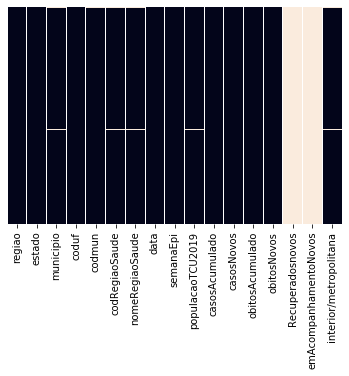

In [6]:
sns.heatmap(covid.isnull(), cbar = False, yticklabels = False) # heatmap de valores nulos

In [7]:
covid.isnull().sum()*100/len(covid) # porcentagem de valores nan em cada coluna

regiao                     0.000000
estado                     0.023222
municipio                  1.031434
coduf                      0.000000
codmun                     0.650227
codRegiaoSaude             1.031434
nomeRegiaoSaude            1.031434
data                       0.000000
semanaEpi                  0.000000
populacaoTCU2019           0.381207
casosAcumulado             0.000000
casosNovos                 0.000000
obitosAcumulado            0.000000
obitosNovos                0.000000
Recuperadosnovos          99.985772
emAcompanhamentoNovos     99.985772
interior/metropolitana     1.031434
dtype: float64

In [8]:
covid.drop(['Recuperadosnovos', 'emAcompanhamentoNovos'], inplace = True, axis = 1)
# retirando as colunas cujas os dados são quase todos nan

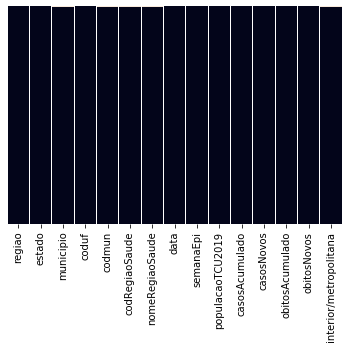

In [9]:
sns.heatmap(covid.isnull(), cbar = False, yticklabels = False) # heatmap de valores nulos

In [10]:
covid.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
611474,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-11,28,3015268,68406,1109,871,15,1.0
611475,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-12,29,3015268,70712,2306,902,31,1.0
611476,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-13,29,3015268,72284,1572,930,28,1.0
611477,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-14,29,3015268,73654,1370,960,30,1.0
611478,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-15,29,3015268,75379,1725,1001,41,1.0


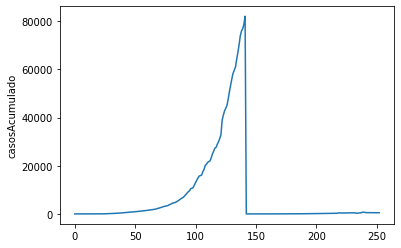

In [11]:
sns.lineplot(np.arange(0, 253), covid[covid['estado'] == 'MG'][:253]['casosAcumulado'])
# parte do dataset é referente à cada estado, considerando o somatório dos municípios do mesmo, porém
# observe que temos um defeito grave nesta parte dos dados, a partir de um certo momento os dados passam a ser 
# inválidos, vamos corrigir isto criando uma função total_de_casos que some, data a data, o número de casos 
# acumulados de cada cidade de MG, ignorando os dados da parte relacionada à MG como um todo

# esta falha nos dados não nos dá segurança sobre os dados dos outros estados, então faremos o mesmo para todos

In [12]:
dates = list(pd.date_range('20200220', '20200715').strftime("%Y-%m-%d")) # gerando datas de 20/02/2020 a 15/07/2020

In [13]:
def total_de_casos(covid): # função resposnável por somar os casos acumulados de cada cidade dia após dia
    newdata = {}
    for i in dates:
        newdata[i] = covid[covid['data'] == i]['casosAcumulado'].sum()
    return newdata

def total_de_obitos(covid): # função resposnável por somar os casos de óbitos acumulados de cada cidade dia após dia
    newdata = {}
    for i in dates:
        newdata[i] = covid[covid['data'] == i]['obitosAcumulado'].sum()
    return newdata

def novos_casos(covid): # função resposnável por somar os novos casos de cada cidade dia após dia
    newdata = {}
    for i in dates:
        newdata[i] = covid[covid['data'] == i]['casosNovos'].sum()
    return newdata

In [14]:
# dicts que armazenará os dados de cada ESTADO
estados_casos_totais = {} # somatório dos casos totais por estado
estados_casos_totais_obitos = {} # somatório dos óbitos totais por estado
estados_novos_casos_totais = {} # somatório dos novos casos totais por estado

for i in np.delete(covid['estado'].unique(), 0): # tomando as siglas dos estados um por um
    estados_casos_totais[i] = total_de_casos(covid[covid['estado'] == i].dropna()) 
    # enviado os datasets de cada estado para total_de_casos()
    # o dropna() é responsável por retirar os dados dos estados como um todo, pois como explicado anteriormente,
    # são inválidos

for i in np.delete(covid['estado'].unique(), 0): # fazendo o mesmo porém com os óbitos com a função total_de_obitos()
    estados_casos_totais_obitos[i] = total_de_obitos(covid[covid['estado'] == i].dropna())

for i in np.delete(covid['estado'].unique(), 0): # fazendo o mesmo porém com os novos casos com a função novos_casos()
    estados_novos_casos_totais[i] = novos_casos(covid[covid['estado'] == i].dropna())

In [15]:
# dicts que armazenará os dados de cada REGIÃO
regiao_casos_totais = {} # somatório dos casos totais por região
regiao_casos_totais_obitos = {} # somatório dos óbitos totais por região
regiao_novos_casos_totais= {} # somatório dos novos casos totais por região

# similarmente como feito na célula anterior, mas agora considerando por regiões

for i in np.delete(covid['regiao'].unique(), 0): # tomando os nomes de cada região uma por uma
    regiao_casos_totais[i] = total_de_casos(covid[covid['regiao'] == i].dropna()) # somando

for i in np.delete(covid['regiao'].unique(), 0): 
    regiao_casos_totais_obitos[i] = total_de_obitos(covid[covid['regiao'] == i].dropna())

for i in np.delete(covid['regiao'].unique(), 0): 
    regiao_novos_casos_totais[i] = novos_casos(covid[covid['regiao'] == i].dropna())

Text(0.5, 1.0, 'total de casos por estado')

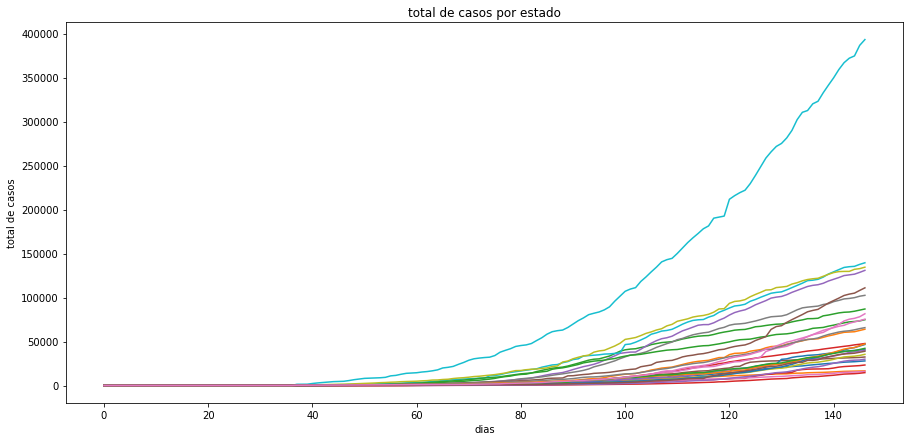

In [16]:
plt.figure(figsize=(15,7))
for i in np.delete(covid['estado'].unique(), 0):
    sns.lineplot(np.arange(0, len(estados_casos_totais[i].values())), list(estados_casos_totais[i].values())).set(xlabel = 'dias', 
                                                                                                                  ylabel = 'total de casos') 
plt.title('total de casos por estado')  
# plotando os dados de cada estado

Text(0.5, 1.0, 'total de óbitos por estado')

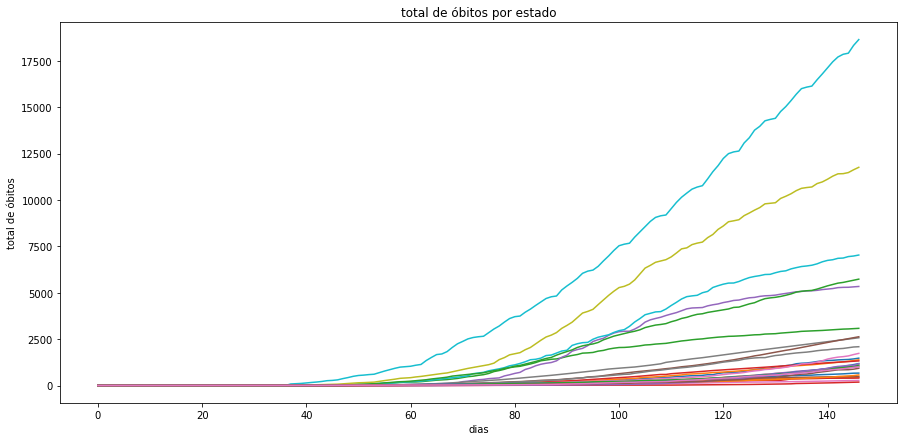

In [17]:
plt.figure(figsize=(15,7))
for i in np.delete(covid['estado'].unique(), 0):
    sns.lineplot(np.arange(0, len(estados_casos_totais_obitos[i].values())), list(estados_casos_totais_obitos[i].values())).set(xlabel = 'dias', ylabel = 'total de óbitos')
plt.title('total de óbitos por estado')

## Não há muito o que perceber além do fato de estar havendo um aumento em todos os estados e que SP é o mais afetado, seria melhor se plotarmos por região do Brasil, pois a visualização dos dados de todos os estados não é eficiente

Text(0.5, 1.0, 'total de casos por região')

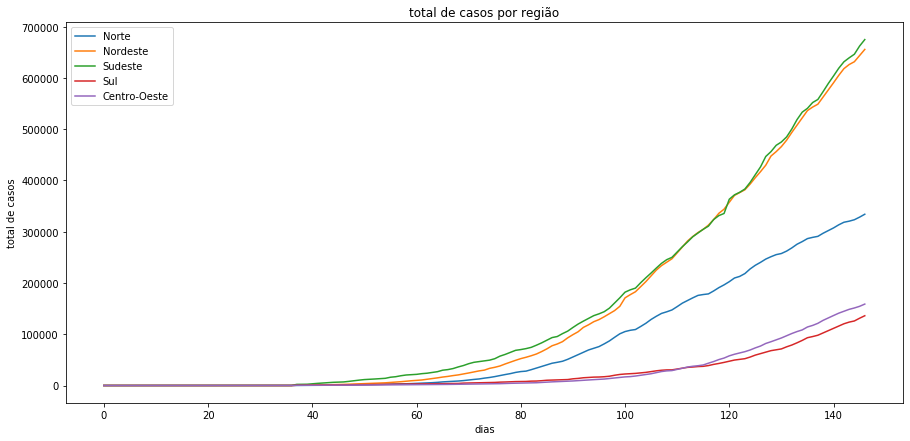

In [18]:
plt.figure(figsize=(15,7))
for i in np.delete(covid['regiao'].unique(), 0):
    sns.lineplot(np.arange(0, len(regiao_casos_totais[i].values())), list(regiao_casos_totais[i].values())).set(xlabel = 'dias', ylabel = 'total de casos') 
plt.legend(labels = np.delete(covid['regiao'].unique(), 0))
plt.title('total de casos por região')
# plot de casos totais por região do Brasil

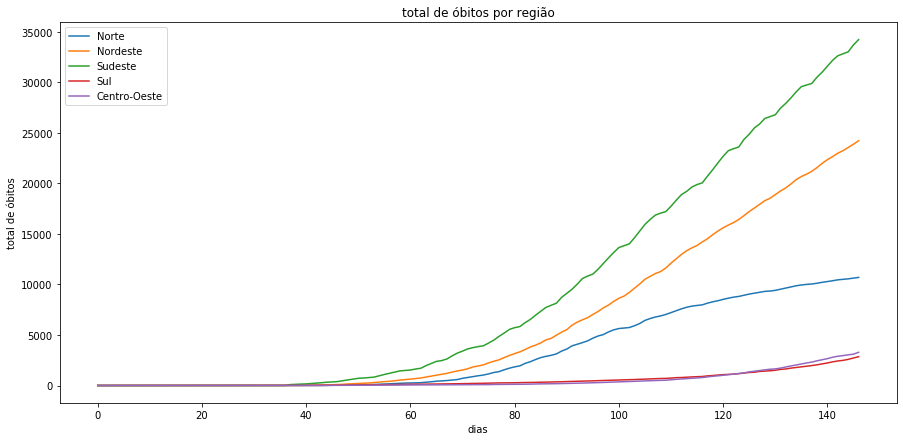

In [19]:
plt.figure(figsize=(15,7))
for i in np.delete(covid['regiao'].unique(), 0):
    sns.lineplot(np.arange(0, len(regiao_casos_totais_obitos[i].values())), list(regiao_casos_totais_obitos[i].values())).set(xlabel = 'dias', ylabel = 'total de óbitos')
plt.title('total de óbitos por região')
plt.legend(labels = np.delete(covid['regiao'].unique(), 0))

Text(0.5, 1.0, 'total de novos casos por região')

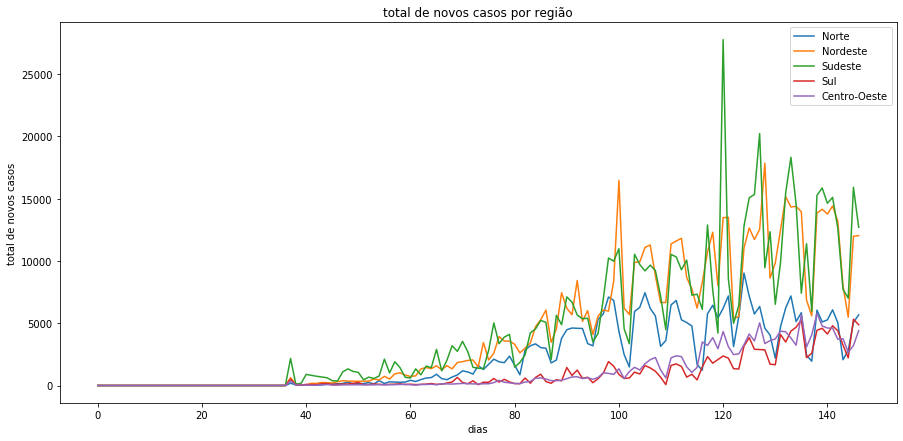

In [20]:
plt.figure(figsize=(15,7))
for i in np.delete(covid['regiao'].unique(), 0):
    sns.lineplot(np.arange(0, len(regiao_novos_casos_totais[i].values())), list(regiao_novos_casos_totais[i].values())).set(xlabel = 'dias', ylabel = 'total de novos casos') 
plt.legend(labels = np.delete(covid['regiao'].unique(), 0))
plt.title('total de novos casos por região')

Text(0.5, 1.0, 'total de óbitos por região')

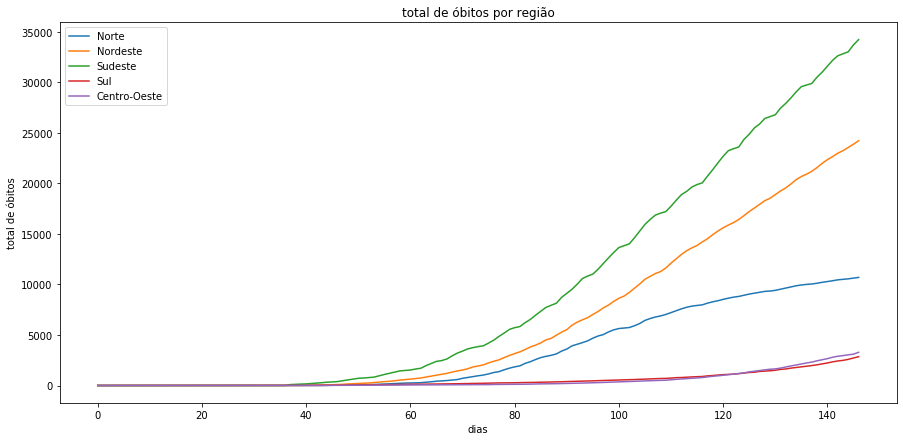

In [21]:
plt.figure(figsize=(15,7))
for i in np.delete(covid['regiao'].unique(), 0):
    sns.lineplot(np.arange(0, len(regiao_casos_totais_obitos[i].values())), list(regiao_casos_totais_obitos[i].values())).set(xlabel = 'dias', ylabel = 'total de óbitos') 
plt.legend(labels = np.delete(covid['regiao'].unique(), 0))
plt.title('total de óbitos por região')

## Como esperado, o Sudeste é a região com maior número de casos confirmados e óbitos

___________________________________________________________________________________________________________________

# Faremos agora uma análise buscando relações entre as eleições de segundo turno de 2018 e os dados do covid-19

In [22]:
# criando um DataFrame chamado casos_totais_estado com o total de casos por dia onde cada coluna é um estado
casos_totais_estado = pd.DataFrame(estados_casos_totais)
casos_totais_obito_estado = pd.DataFrame(estados_casos_totais_obitos)

In [23]:
casos_totais_obito_estado = pd.DataFrame(estados_casos_totais_obitos)
casos_totais_obito_estado

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
2020-02-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-11,617,419,3023,395,5274,473,251,2426,914,6853,...,1978,11406,17702,999,485,943,153,1029,844,871
2020-07-12,628,426,3039,395,5289,474,255,2463,936,6868,...,1997,11415,17848,1028,497,962,161,1047,849,902
2020-07-13,647,430,3048,396,5293,478,259,2501,960,6947,...,2033,11474,17907,1072,517,995,167,1085,852,930
2020-07-14,663,436,3063,397,5318,483,267,2536,992,6977,...,2075,11624,18324,1129,534,1060,177,1085,880,960


In [24]:
novos_casos_totais_estado = pd.DataFrame(estados_novos_casos_totais)
novos_casos_totais_estado

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
2020-02-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-11,496,312,723,620,2260,199,430,1680,1196,2405,...,867,232,7780,1265,1896,1230,708,1240,655,1109
2020-07-12,232,110,296,372,780,85,193,554,498,825,...,562,9,5107,1729,996,520,228,775,451,2306
2020-07-13,322,70,886,383,795,188,175,878,396,418,...,1077,2360,2610,1037,771,416,264,381,452,1572
2020-07-14,478,219,1229,330,2061,333,416,1637,797,2236,...,1329,778,11996,1775,2209,1337,473,225,1136,1370


In [25]:
# separando os estados cujos quais elegeram os respectivos candidatos a presidente em 2018

# estados onde cada candidato venceu
estados_bolsonaro = ['MG', 'RS', 'SC', 'PR', 'SP', 'RJ', 'ES', 'GO', 'DF', 'MS', 'MT', 'RO', 'AC', 'AM', 'RR', 'AP']
estados_haddad = ['PA', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']

# separando os dados e somando-os
bolsonaro_casos_totais = casos_totais_estado[estados_bolsonaro].sum(axis = 1)
haddad_casos_totais = casos_totais_estado[estados_haddad].sum(axis = 1)

bolsonaro_obitos_totais = casos_totais_obito_estado[estados_bolsonaro].sum(axis = 1)
haddad_obitos_totais = casos_totais_obito_estado[estados_haddad].sum(axis = 1)

bolsonaro_novos_casos_totais = novos_casos_totais_estado[estados_bolsonaro].sum(axis = 1)
haddad_novos_casos_totais = novos_casos_totais_estado[estados_haddad].sum(axis = 1)

Text(0.5, 1.0, 'total de casos por orientação política')

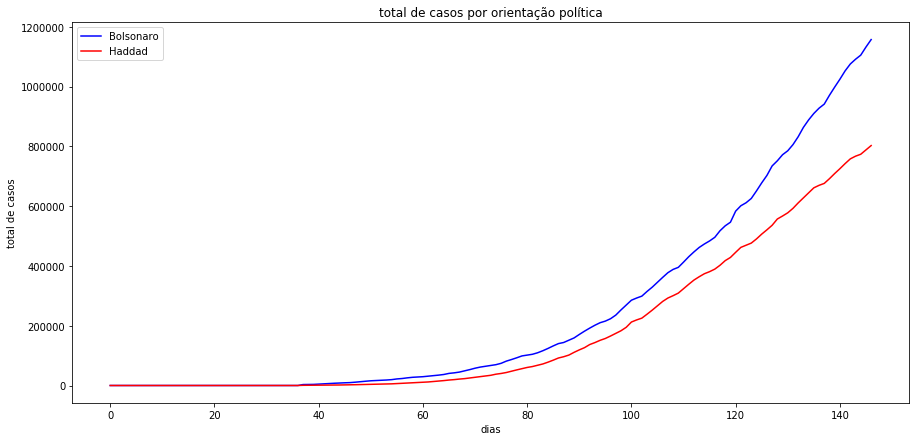

In [26]:
plt.figure(figsize=(15,7))
sns.lineplot(np.arange(0, len(bolsonaro_casos_totais)), bolsonaro_casos_totais.values, color = 'b').set(xlabel = 'dias', ylabel = 'total de casos')
sns.lineplot(np.arange(0, len(haddad_casos_totais)), haddad_casos_totais.values, color = 'r')
plt.legend(labels = ['Bolsonaro', 'Haddad'])
plt.title('total de casos por orientação política')

## Note acima que o somatório de casos totais nos estados que elegeram o Bolsonaro em 2018 é relativamente maior que o somatório dos casos totais nos estados que votaram em Haddad. Uma das explicações plausíveis é que os estados que elegeram Bolsonaro são maiores em número de população, além de que são estados economicamente mais ativos como por exemplo São Paulo e Rio de Janeiro, justificando a alta atividade do comércio e por isso maior ploliferação do vírus.

Text(0.5, 1.0, 'total de óbitos por orientação política')

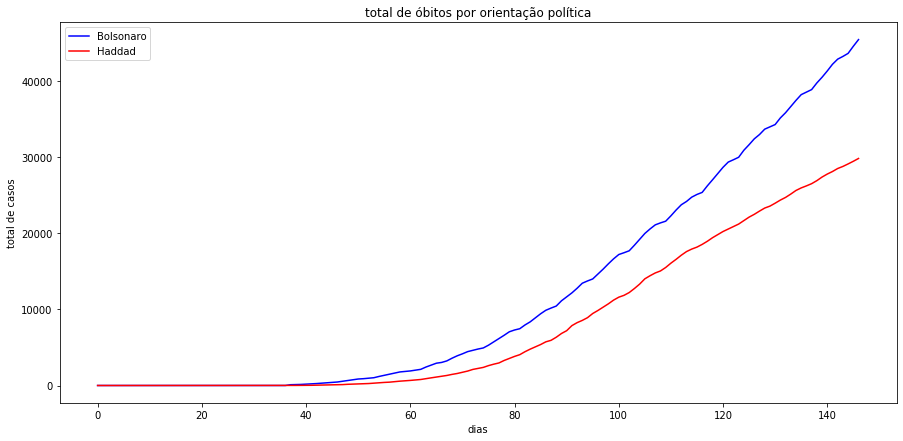

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(np.arange(0, len(bolsonaro_obitos_totais)), bolsonaro_obitos_totais.values, color = 'b').set(xlabel = 'dias', ylabel = 'total de casos')
sns.lineplot(np.arange(0, len(haddad_obitos_totais)), haddad_obitos_totais.values, color = 'r')
plt.legend(labels = ['Bolsonaro', 'Haddad'])
plt.title('total de óbitos por orientação política')

## Novamente é possível perceber que os o somatório de óbitos nos estados que elegeram bolsonaro tem uma taxa levemente maior que os estados que votaram em Haddad. Isso pode ser justificado pela análise anterior

Text(0.5, 1.0, 'total de novos casos')

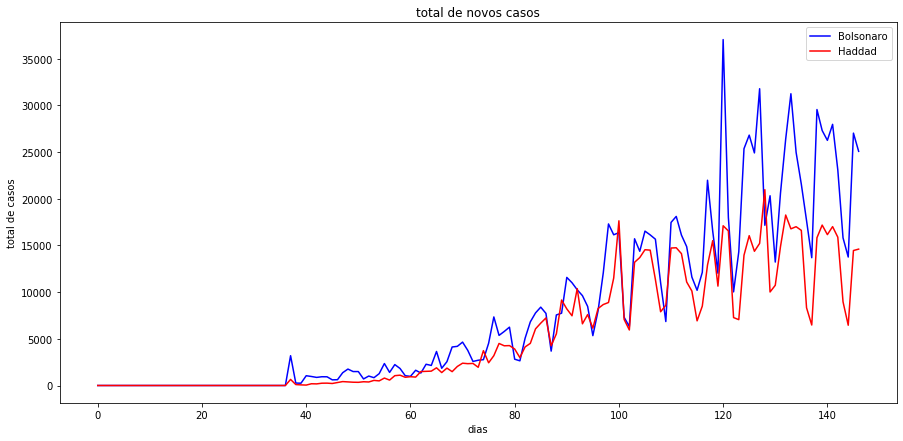

In [28]:
plt.figure(figsize=(15,7))
sns.lineplot(np.arange(0, len(bolsonaro_novos_casos_totais)), bolsonaro_novos_casos_totais.values, color = 'b').set(xlabel = 'dias', ylabel = 'total de casos')
sns.lineplot(np.arange(0, len(haddad_novos_casos_totais)), haddad_novos_casos_totais.values, color = 'r')
plt.legend(labels = ['Bolsonaro', 'Haddad'])
plt.title('total de novos casos')

## Acima vemos o somatório de novos casos, seguindo o mesmo princípio

___________________________________________________________________________________________________________________

# Análise relacionando o número total de casos pela população total

### Para ignorarmos o fato de que os estados que votaram no bolsonaro têm as maiores populações e por isso possuem os maiores índices de contaminados, nós faremos o seguinte: o somatório da população dos estados onde cada político venceu e relacionaremos com a quantidade total de casos destes mesmos estados visando analisar o andamento porcentual do número de infectados por bloco político


In [29]:
# tomando a população total de cada estado
pop_estados = {}
for i in np.delete(covid['estado'].unique(), 0):
    pop_estados[i] = int(covid[covid['estado'] == i]['populacaoTCU2019'][covid[covid['estado'] == i]['populacaoTCU2019'].index[0]])

In [30]:
pop_estados # observe que temos um dict onde as keys são as siglas dos estados e os values são a população total

{'RO': 1777225,
 'AC': 881935,
 'AM': 4144597,
 'RR': 605761,
 'PA': 8602865,
 'AP': 845731,
 'TO': 1572866,
 'MA': 7075181,
 'PI': 3273227,
 'CE': 9132078,
 'RN': 3506853,
 'PB': 4018127,
 'PE': 9557071,
 'AL': 3337357,
 'SE': 2298696,
 'BA': 14873064,
 'MG': 21168791,
 'ES': 4018650,
 'RJ': 17264943,
 'SP': 45919049,
 'PR': 11433957,
 'SC': 7164788,
 'RS': 11377239,
 'MS': 2778986,
 'MT': 3484466,
 'GO': 7018354,
 'DF': 3015268}

In [31]:
# nesta célula nós somaremos em pop_bolsonaro e pop_haddad a população total dos estados onde cada candidato venceu
pop_bolsonaro = 0
pop_haddad = 0

for i in estados_bolsonaro:
    pop_bolsonaro += pop_estados[i]

for i in estados_haddad:
    pop_haddad += pop_estados[i]

In [32]:
pop_bolsonaro, pop_haddad # número total de pessoas

(142899740, 67247385)

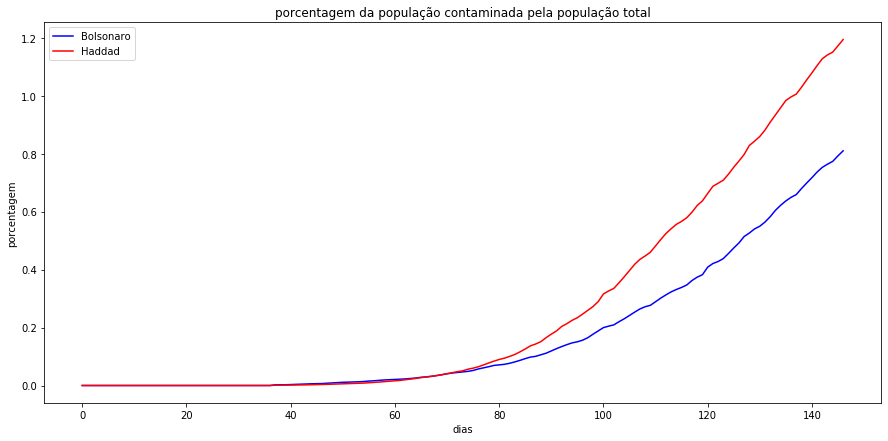

In [33]:
# plotando os resultados
# apenas dividi os dados de bolsonaro_casos_totais por pop_bolsonaro e multipliquei por 100 para ter em porcentagem
# fiz o mesmo com haddad_casos_totais e pop_haddad
plt.figure(figsize=(15,7))
sns.lineplot(np.arange(0, len((bolsonaro_casos_totais*100/pop_bolsonaro).values)), (bolsonaro_casos_totais*100/pop_bolsonaro).values, color = 'b').set(xlabel = 'dias', ylabel = 'porcentagem')
sns.lineplot(np.arange(0, len((haddad_casos_totais*100/pop_haddad).values)), (haddad_casos_totais*100/pop_haddad).values, color = 'r')
plt.title('porcentagem da população contaminada pela população total')
plt.legend(labels = ['Bolsonaro', 'Haddad'])

# É possível notar que os estados que votaram em Haddad no segundo turno possuem uma porcentagem de contaminados calculados em cima da população total maior em relação aos estados que votaram em Bolsonaro.

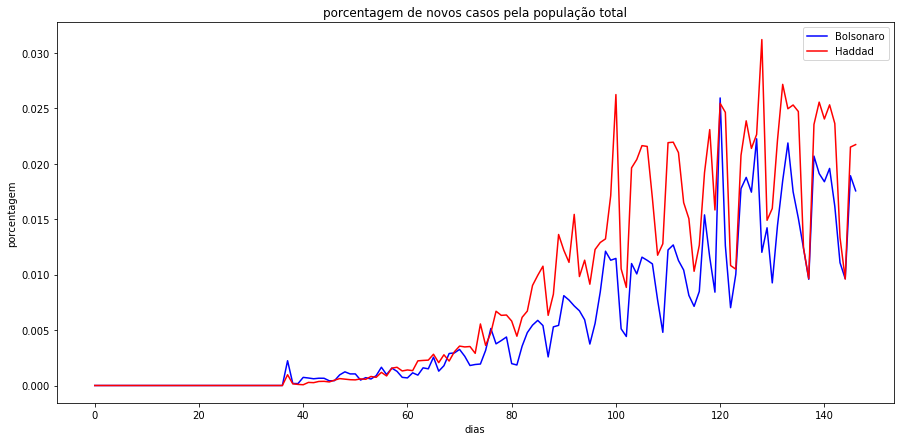

In [34]:
plt.figure(figsize=(15,7))
sns.lineplot(np.arange(0, len((bolsonaro_novos_casos_totais*100/pop_bolsonaro).values)), (bolsonaro_novos_casos_totais*100/pop_bolsonaro).values, color = 'b').set(xlabel = 'dias', ylabel = 'porcentagem')
sns.lineplot(np.arange(0, len((haddad_novos_casos_totais*100/pop_haddad).values)), (haddad_novos_casos_totais*100/pop_haddad).values, color = 'r')
plt.title('porcentagem de novos casos pela população total')
plt.legend(labels = ['Bolsonaro', 'Haddad'])

## Seguindo o mesmo princípio do último gráfico, podemos ver que a porcentagem de novos casos em relação à população total do bloco político é maior nos estados que votaram em Haddad

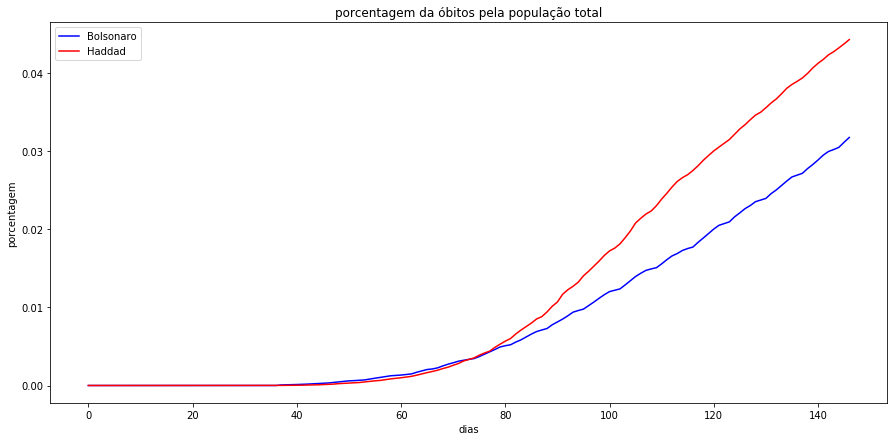

In [35]:
plt.figure(figsize=(15,7))
sns.lineplot(np.arange(0, len((bolsonaro_obitos_totais*100/pop_bolsonaro).values)), (bolsonaro_obitos_totais*100/pop_bolsonaro).values, color = 'b').set(xlabel = 'dias', ylabel = 'porcentagem')
sns.lineplot(np.arange(0, len((haddad_obitos_totais*100/pop_haddad).values)), (haddad_obitos_totais*100/pop_haddad).values, color = 'r')
plt.title('porcentagem da óbitos pela população total')
plt.legend(labels = ['Bolsonaro', 'Haddad'])

##  O mesmo acontece relacionando a portentagem de óbitos pela população total